In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1. Changing Colorspaces

Một số colorspace: 
- RGB (Trong OpenCV là BGR)
- HSV
- Gray

In [3]:
flag = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flag)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

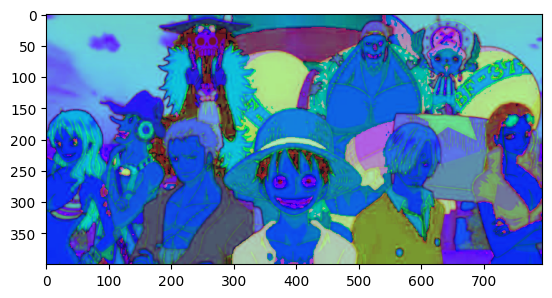

In [8]:
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/OP.jpg')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_HSV)

Cách tìm HSV color

In [12]:
green = np.uint8([[[0,255,0]]])
hsv = cv2.cvtColor(green ,cv2.COLOR_BGR2HSV)
print(hsv)

[[[ 60 255 255]]]


Khi đó có thể lấy (h-10, 100, 100) là lower bound và (h+10,255,255) là upper bound

### 2. Geometric Transformations of Images

#### 2.1 Scaling

cv2 có thể phóng to thu nhỏ bức ảnh theo tỉ lệ % (Ví dụ phóng to gấp đôi) bằng cách sử dụng cv2.resize().

Interpolation mode:
- INTER_AREA: Dùng để thu nhỏ
- INTER_CUBIC: Dùng để phóng to
- INTER_LINEAR: Dùng cho cả phóng to và thu nhỏ (Mặc định)

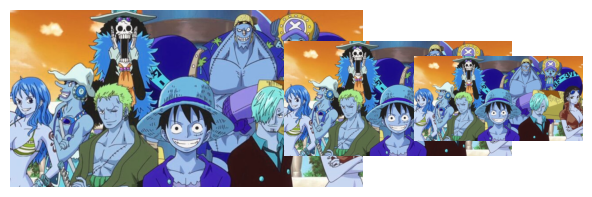

In [ ]:
img_res = cv2.resize(img, None, fx = 2, fy = 2, 
                     interpolation = cv2.INTER_CUBIC) # Tăng gấp đôi kích thước của ảnh
img_res2 = cv2. resize(img, None, fx = 0.5, fy = 0.5, 
                       interpolation = cv2.INTER_AREA) # Giảm 1 nửa kích thước của ảnh

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
plt.imshow(img_res)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_res2)
plt.axis('off')

plt.show()

#### 2.2 Translation (Tịnh tiến)

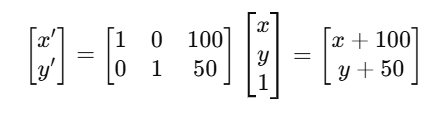

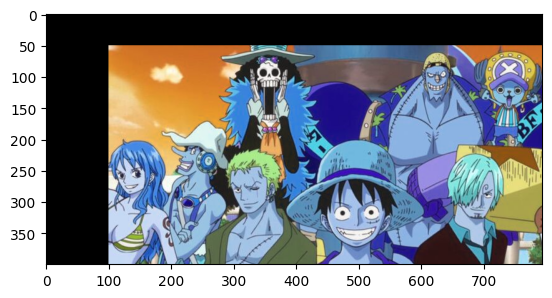

In [45]:
M = np.float32([[1, 0, 100], [0, 1, 50]]) # Dịch sang phải một khoảng (x,y) = (100, 50)

shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(shifted)

#### 2.3 Rotation

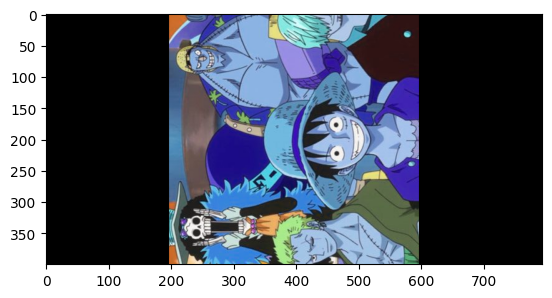

In [ ]:
w = img.shape[1]
h = img.shape[0]
M = cv2.getRotationMatrix2D((w/2,h/2),90,1) # Rotate 90 độ, w/2 và h/2 là toạ độ center của bức ảnh
img_rot = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(img_rot)

#### 2.4 Perspective Transformation

- Dùng để thay đổi góc nhìn của bức ảnh như nhìn ở vị trí khác
- Cần phải tìm 4 điểm ở ảnh đầu vào và 4 điểm ở ảnh đầu ra sao cho không có 3 điểm nào trong 4 điểm thẳng hàng -> Dùng hàm cv2.getPerpectiveTransform() để tìm ma trận transform

In [49]:
img.shape

(400, 794, 3)

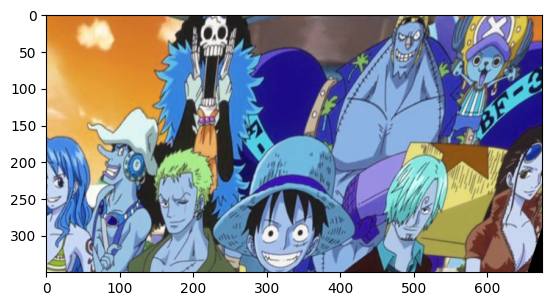

In [52]:
pts = np.float32([[25,25],[25,700],[375,25],[375,700]])
pts1 = np.float32([[0,0],[0,675],[350,0],[250,675]])
M = cv2.getPerspectiveTransform(pts,pts1)
pers_tran = cv2.warpPerspective(img, M, (675,350))
plt.imshow(pers_tran)

### 3. Image thresholding

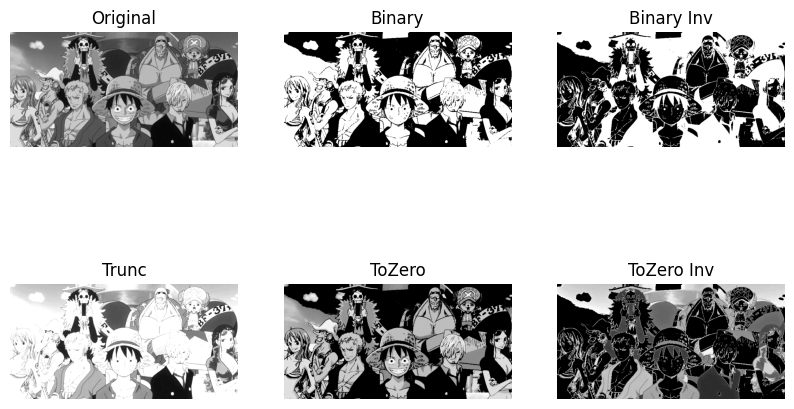

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original", "Binary", "Binary Inv", "Trunc", "ToZero", "ToZero Inv"]
images = [img, th1, th2, th3, th4, th5]

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()